In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ALTERNATIVE="from_scratch"
#ALTERNATIVE="pretrained"

NOISE_LEVEL=0.3
INDEX=0

DIR="outputs_for_noisy_input"
df = pd.read_parquet(f"{DIR}/alexnet_{INDEX}_{NOISE_LEVEL}_{ALTERNATIVE}.parquet")
df

,output,value
0,0,-13.024501
1,1,-11.967443
2,2,-4.752079
3,3,25.001484
4,4,-19.646469
...,...,...
999995,5,5.463448
999996,6,-7.568424
999997,7,-15.157127
999998,8,-20.216658


In [3]:
min_val = int(df["value"].min())-1
max_val = int(df["value"].max())+1
min_val, max_val

(-25, 30)

In [6]:
nula = df[df["output"]==0]

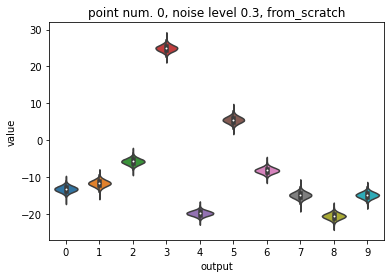

In [7]:
sns.violinplot(data=df, x="output", y="value")
plt.title(f"point num. {INDEX}, noise level {NOISE_LEVEL}, {ALTERNATIVE}")
plt.savefig(f"outputs_{ALTERNATIVE}_{INDEX}_{NOISE_LEVEL}.png",
           facecolor='white', transparent=False, dpi=600)

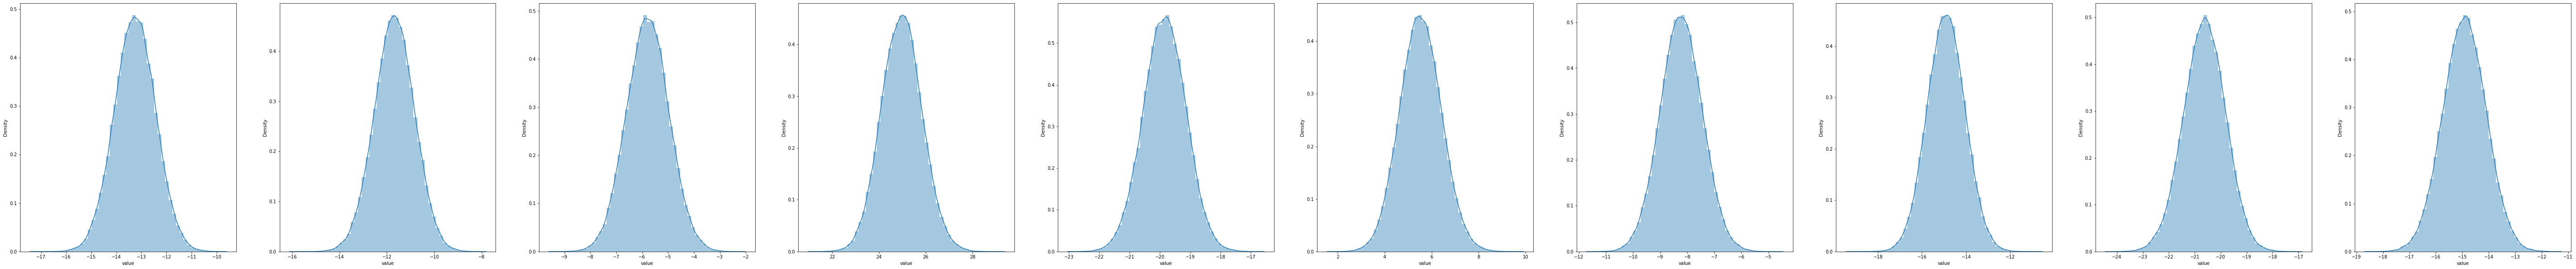

In [15]:
fig, axs = plt.subplots(ncols=10, nrows=1, figsize=(100,10))

for i in range(10):
    sns.distplot(df[df["output"]==i]["value"], ax=axs[i])